In [33]:
from Dataset import Dataset
from conditonalDCGAN import ConditionalGenerator, ConditionalDiscriminator
from DCGAN import Generator, Discriminator
from model_wrapper import Trainer
import torch
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter
import os
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
GAN_LOGS = os.path.join(os.getcwd(), "tboard_logs", "gan")
if not os.path.exists(GAN_LOGS):
    os.makedirs(GAN_LOGS)

shutil.rmtree(GAN_LOGS)
writer = SummaryWriter(GAN_LOGS)


# Create a dataset and a DataLoader
transforms = {'val':transforms.Compose([
    transforms.Resize([32, 32]),  # Resize the image first
    transforms.ToTensor(),        # Convert PIL image to tensor
]),
'train':transforms.Compose([
    transforms.Resize([32, 32]),  # Resize the image first
    transforms.RandomHorizontalFlip(p=0.5),       # Random horizontal flip
    transforms.ToTensor(),        # Convert PIL image to tensor
])
}

In [7]:
root_dir = "/home/user/zafara1/Cuda_Vision_Lab-/Session5/Solution/data/afhq"

# Initialize dataset
train_dataset = Dataset(root_dir=root_dir, split="train", transform=transforms["train"])
# test_dataset = Dataset(root_dir=root_dir, split="val", transform=transforms["val"])


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True,num_workers=8,pin_memory=True)
# test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False,num_workers=8,pin_memory=True)
# print("test_dataset per epoch",next(iter(test_loader))[0].size())


## DCGAN training

In [8]:
# Initialize models, loss function, and optimizers
generator = Generator(latent_dim=128, num_channels=3, base_channels=64)
discriminator = Discriminator(in_channels=3, out_dim=1, base_channels=64)


optimizer_g = torch.optim.Adam(generator.parameters(), lr=0.00003, betas=(0.5, 0.999))
optimizer_d = torch.optim.Adam(discriminator.parameters(), lr=0.00001, betas=(0.5, 0.999))

In [43]:
print(generator)

Generator(
  (model): Sequential(
    (0): ConvTransposeBlock(
      (block): Sequential(
        (0): ConvTranspose2d(128, 512, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
    )
    (1): ConvTransposeBlock(
      (block): Sequential(
        (0): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
    )
    (2): ConvTransposeBlock(
      (block): Sequential(
        (0): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
    )
    (3): ConvTransposeBlock(
      (block): Sequential(
        (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))

In [44]:
print(discriminator)

Discriminator(
  (model): Sequential(
    (0): ConvBlock(
      (block): Sequential(
        (0): Conv2d(3, 128, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2))
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2)
        (3): Dropout(p=0.3, inplace=False)
      )
    )
    (1): ConvBlock(
      (block): Sequential(
        (0): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2))
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2)
        (3): Dropout(p=0.3, inplace=False)
      )
    )
    (2): ConvBlock(
      (block): Sequential(
        (0): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2))
        (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2)
        (3): Dropout(p=0.3, inplace=False)
      )
    

In [11]:
trainer = Trainer(generator=generator, discriminator=discriminator, latent_dim=128, conditional_gan=False, writer=writer)

  0%|          | 0/229 [00:00<?, ?it/s]

Epoch 1 Iter 228: D_Loss=0.16369, G_Loss=4.0922): 100%|██████████| 229/229 [00:11<00:00, 20.67it/s]  
Epoch 2 Iter 457: D_Loss=0.81129, G_Loss=3.19142): 100%|██████████| 229/229 [00:08<00:00, 25.70it/s] 
Epoch 3 Iter 686: D_Loss=0.26785, G_Loss=3.64461): 100%|██████████| 229/229 [00:09<00:00, 22.91it/s] 
Epoch 4 Iter 915: D_Loss=0.1844, G_Loss=8.45092): 100%|██████████| 229/229 [00:10<00:00, 22.66it/s]  
Epoch 5 Iter 1144: D_Loss=0.21514, G_Loss=4.19139): 100%|██████████| 229/229 [00:10<00:00, 22.25it/s] 
Epoch 6 Iter 1373: D_Loss=1.00548, G_Loss=1.95581): 100%|██████████| 229/229 [00:10<00:00, 22.19it/s] 
Epoch 7 Iter 1602: D_Loss=0.28721, G_Loss=2.31421): 100%|██████████| 229/229 [00:09<00:00, 25.34it/s] 
Epoch 8 Iter 1831: D_Loss=0.23486, G_Loss=9.22125): 100%|██████████| 229/229 [00:08<00:00, 26.90it/s] 
Epoch 9 Iter 2060: D_Loss=0.27205, G_Loss=6.46184): 100%|██████████| 229/229 [00:10<00:00, 21.83it/s]
Epoch 10 Iter 2289: D_Loss=1.89244, G_Loss=5.99778): 100%|██████████| 229/229 

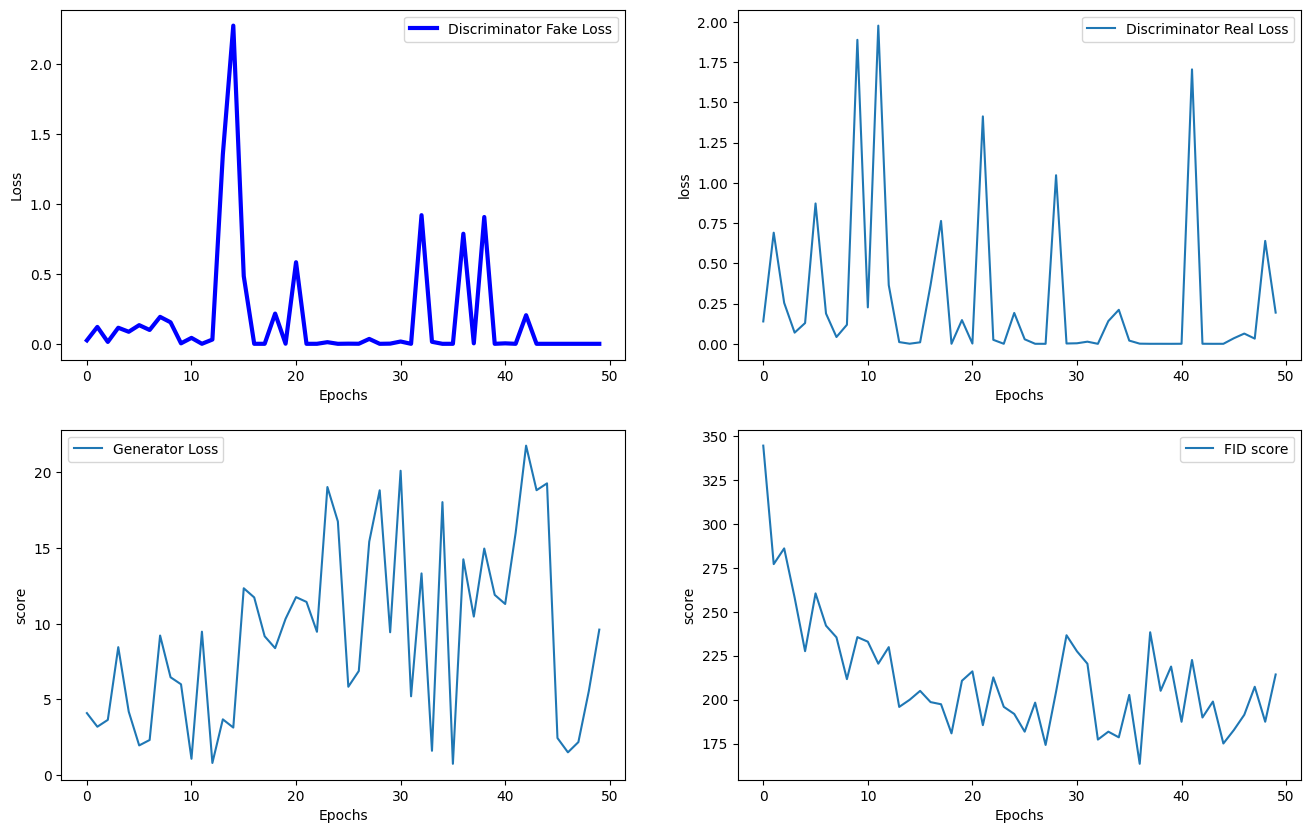

In [12]:
trainer.train(data_loader=train_loader)

### Images generated in final Epoch

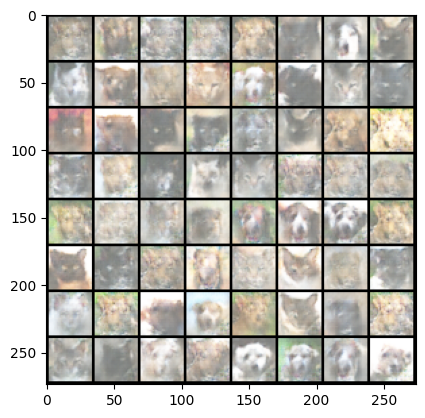

In [34]:
plt.imshow(mpimg.imread('imgs//training/imgs_11400.png'))

Overall the images represent diversity. The model has been able to capture the different classes and represent them separately. However, there are some instances in which the model has generated unrealistic images with different classes being combined in a single instance.


### Comparision with VAE

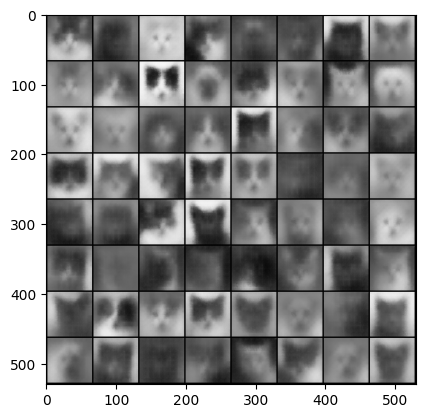

In [42]:
plt.imshow(mpimg.imread('imgs/training/COnvVAErecons9.png'))

DCGAN has generated more realistic images as compared to ConVAE. However, it took more Epochs to train the DCGAN model. The FID score is also lower for DCGAN as compared to ConVAE. Showing that DCGAN was better able to match the diversity and had closer distribution.

Training DCGAN was much more challenging. The loss results of generator was quite unstable and it was much more challenging setting the hyperparameters of the model. In contrast, training ConVAE was much more straightforward task

## Conditional DCGAN training

In [49]:
# Initialize models, loss function, and optimizers
conditional_generator = ConditionalGenerator(latent_dim=128, num_channels=3, base_channels=64, num_classes=3)
conditional_discriminator = ConditionalDiscriminator(in_channels=3, out_dim=1, base_channels=64, num_classes=3)

optimizer_gc = torch.optim.Adam(conditional_generator.parameters(), lr=0.0003, betas=(0.5, 0.9))
optimizer_dc = torch.optim.Adam(conditional_discriminator.parameters(), lr=0.0003, betas=(0.5, 0.9))

In [50]:
conditionaltrainer = Trainer(generator=conditional_generator, discriminator=conditional_discriminator, optimizer_g=optimizer_gc, optimizer_d=optimizer_dc,latent_dim=128, conditional_gan=True,writer=writer)

  0%|          | 0/229 [00:00<?, ?it/s]

Epoch 1 Iter 228: D_Loss=0.32563, G_Loss=3.31854): 100%|██████████| 229/229 [00:07<00:00, 29.67it/s]
Epoch 2 Iter 457: D_Loss=0.28828, G_Loss=2.94442): 100%|██████████| 229/229 [00:07<00:00, 30.71it/s]
Epoch 3 Iter 686: D_Loss=0.99154, G_Loss=1.69908): 100%|██████████| 229/229 [00:07<00:00, 30.29it/s]
Epoch 4 Iter 915: D_Loss=0.98294, G_Loss=1.62489): 100%|██████████| 229/229 [00:07<00:00, 30.66it/s]
Epoch 5 Iter 1144: D_Loss=1.18323, G_Loss=1.16885): 100%|██████████| 229/229 [00:07<00:00, 30.07it/s]
Epoch 6 Iter 1373: D_Loss=1.20628, G_Loss=1.27438): 100%|██████████| 229/229 [00:07<00:00, 30.42it/s]
Epoch 7 Iter 1602: D_Loss=1.12778, G_Loss=0.9908): 100%|██████████| 229/229 [00:07<00:00, 30.58it/s] 
Epoch 8 Iter 1831: D_Loss=1.44465, G_Loss=1.00227): 100%|██████████| 229/229 [00:07<00:00, 30.97it/s]
Epoch 9 Iter 2060: D_Loss=1.30612, G_Loss=1.27525): 100%|██████████| 229/229 [00:07<00:00, 29.61it/s]
Epoch 10 Iter 2289: D_Loss=1.27935, G_Loss=1.10929): 100%|██████████| 229/229 [00:08<0

tensor([2, 2, 2, 1, 1, 0, 1, 0, 0, 2, 1, 0, 2, 1, 1, 1, 0, 2, 1, 1, 0, 2, 2, 1,
        0, 0, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2], device='cuda:0')


Epoch 50 Iter 11449: D_Loss=0.86398, G_Loss=1.33116): 100%|██████████| 229/229 [00:07<00:00, 30.38it/s]


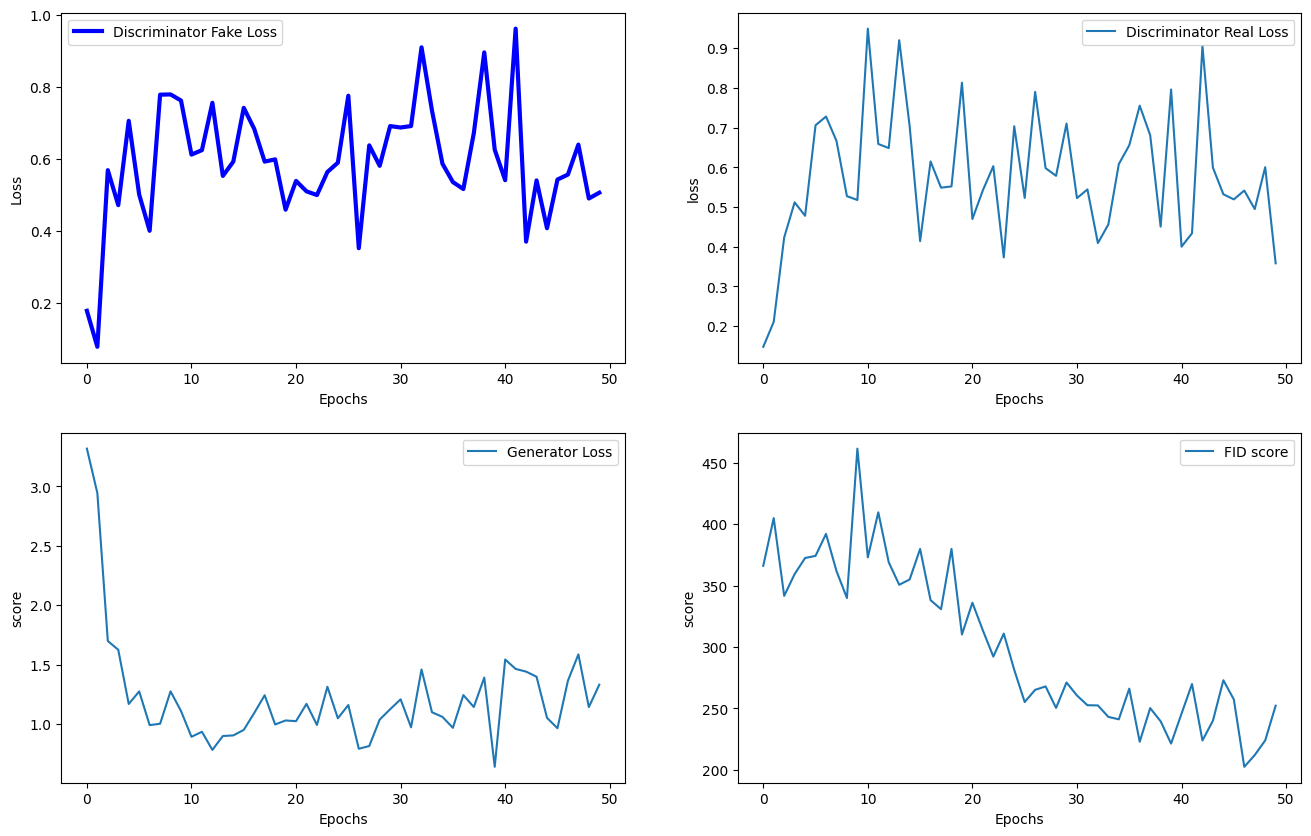

In [51]:
conditionaltrainer.train(data_loader=train_loader)

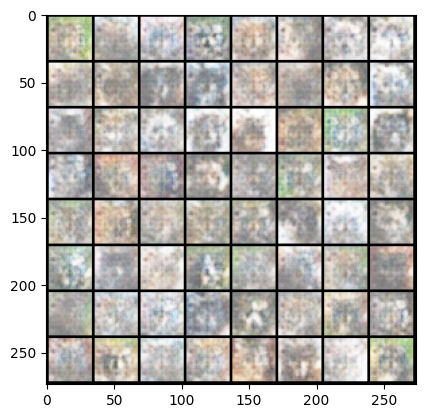

In [ ]:
plt.imshow(mpimg.imread('imgs//training/conditional_imgs_11400.png'))

### Labels
# (2, 2, 2, 1, 1, 0, 1, 0, 0, 2, 1, 0, 2, 1, 1, 1, 0, 2, 1, 1, 0, 2, 2, 1,
# 0, 0, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 0, 0, 1, 0, 0, 0, 1,
# 0, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2)
# Where 0=Cat, 1=Dogs, 2=Wild

The results from ConditionalDCGAN shows a lot of noise present in the images. The issue is likely due to label encoding and being attached to the images. The FID score is however similar to DCGAN.